## Carregando bibliotecas de visualização

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Funções de plotagem

In [17]:
pallete = "cividis"
def plot_environments_metrics_mode_1(df_env, img_name):

    df_melted = df_env.melt(
        id_vars=["environment"], var_name="Atributos", value_name="qtd"
    )
    df_melted = df_melted[df_melted["Atributos"] != "total_rows"]

    plt.figure(figsize=(10, 8))
    ax = sns.barplot(
        x="qtd", y="environment", hue="Atributos", data=df_melted, palette=pallete
    )

    for i in ax.containers:
        ax.bar_label(
            i,
        )

    plt.title("Caracteristicas de ambientes - Estratégia 1", fontsize=18)
    plt.xlabel("Quantidade de elementos")
    plt.ylabel("Ambientes RAW")
    plt.legend(title="Atributos")
    plt.savefig("plots/" + img_name + "_environnments_metrics.png")
    plt.show()


def plot_environments_metrics_mode_2(df_env, img_name):

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)

    ax = sns.barplot(data=df_env, x="environment", y="initial_clean_dataframe_size_MB", palette=pallete, hue= "environment")
    for i in ax.containers:
        ax.bar_label(
            i,
        )

    plt.title(f"Tamanho inicial da camada CLEAN (MBs)", fontsize=18)
    plt.xlabel("Ambientes", fontsize=12)
    plt.ylabel("MBs", fontsize=12)

    plt.subplot(2, 1, 2)

    ax = sns.barplot(data=df_env, x="environment", y="num_lines", palette=pallete, hue= "environment")
    for i in ax.containers:
        ax.bar_label(
            i,
        )

    plt.title(f"N registros por ambiente", fontsize=18)
    plt.xlabel("Ambientes", fontsize=12)
    plt.ylabel("Registros", fontsize=12)

    plt.savefig("plots/" + img_name + "_environnments_metrics.png")
    plt.tight_layout()
    plt.show()


def plot_engines_total_time(df_engines, img_name):

    avg_etl_time = (
        df_engines.groupby(["environment", "engine"])["total_etl_time"]
        .mean()
        .reset_index()
    )

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(
        x="environment",
        y="total_etl_time",
        hue="engine",
        data=avg_etl_time,
        palette=pallete,
    )

    for i in ax.containers:
        ax.bar_label(
            i,
        )

    plt.title("Tempo de Processamento Total por Engine e Ambiente", fontsize=18)
    plt.xlabel("Ambiente")
    plt.ylabel("Tempo Total de ETL")
    plt.legend(title="Engine")
    plt.savefig("plots/" + img_name + "_engines_total_time.png")
    plt.show()


def plot_engines_steps_time(df_engines,img_name, y_lim=35 ):
    df_melted = df_engines.melt(
        id_vars=["environment", "engine", "total_etl_time"],
        var_name="ETL Step",
        value_name="Time (seconds)",
    )

    plt.figure(figsize=(12, 16))

    engines = df_engines["engine"].unique()
    for i, engine in enumerate(engines, 1):
        plt.subplot(3, 1, i)
        env_data = df_melted[df_melted["engine"] == engine]

        ax = sns.barplot(
            data=env_data,
            x="environment",
            y="Time (seconds)",
            hue="ETL Step",
            palette=pallete,
        )
        for i in ax.containers:
            ax.bar_label(
                i,
            )

        plt.ylim(0, y_lim)
        plt.title(
            f"Tempo de processamento por etapas - {engine.capitalize()}", fontsize=18
        )
        plt.xlabel("ETL Step", fontsize=12)
        plt.ylabel("Time (seconds)", fontsize=12)
        plt.legend(title="Steps", loc="upper left")

    # plt.tight_layout()
    plt.savefig("plots/" + img_name + "_engines_steps_time.png")
    plt.show()



## Estratégia 1


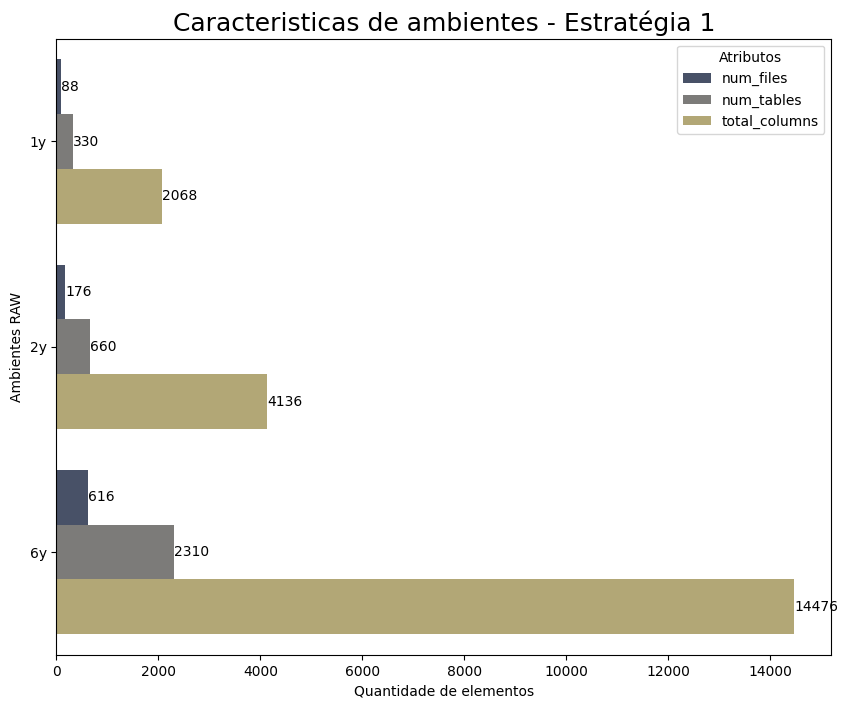

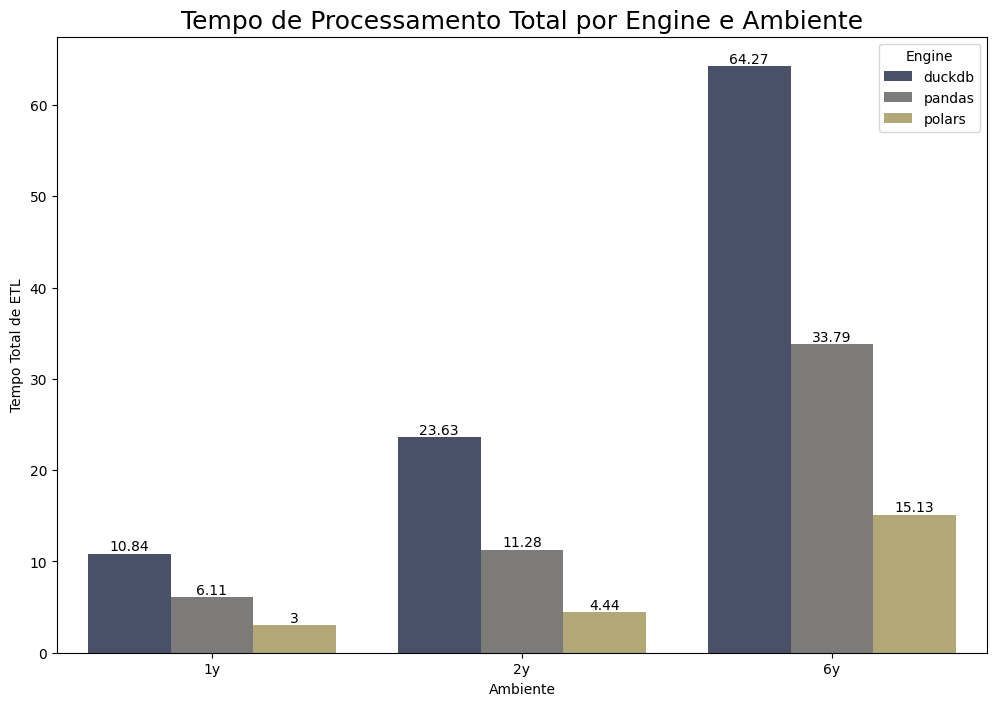

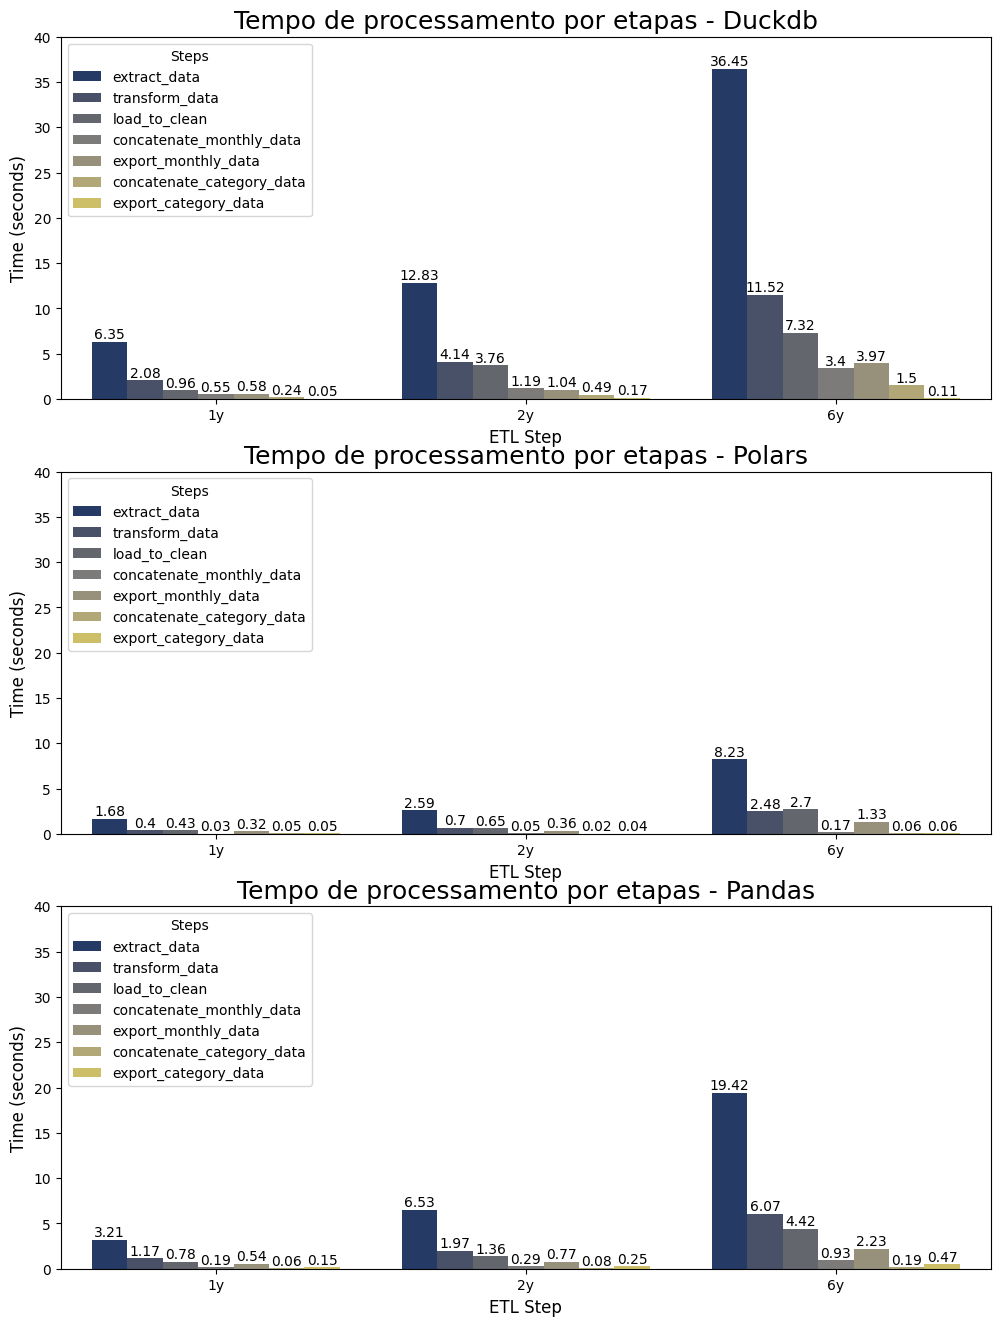

In [20]:
df_env = pd.read_csv('data/linkedin/clean/m1/environments.csv')
df_engines = pd.read_csv('data/linkedin/clean/m1/engines.csv')
img_name = "statistics_m1"

plot_environments_metrics_mode_1(df_env, img_name)
plot_engines_total_time(df_engines, img_name )
plot_engines_steps_time(df_engines, img_name, y_lim=40)

## Estratégia 2

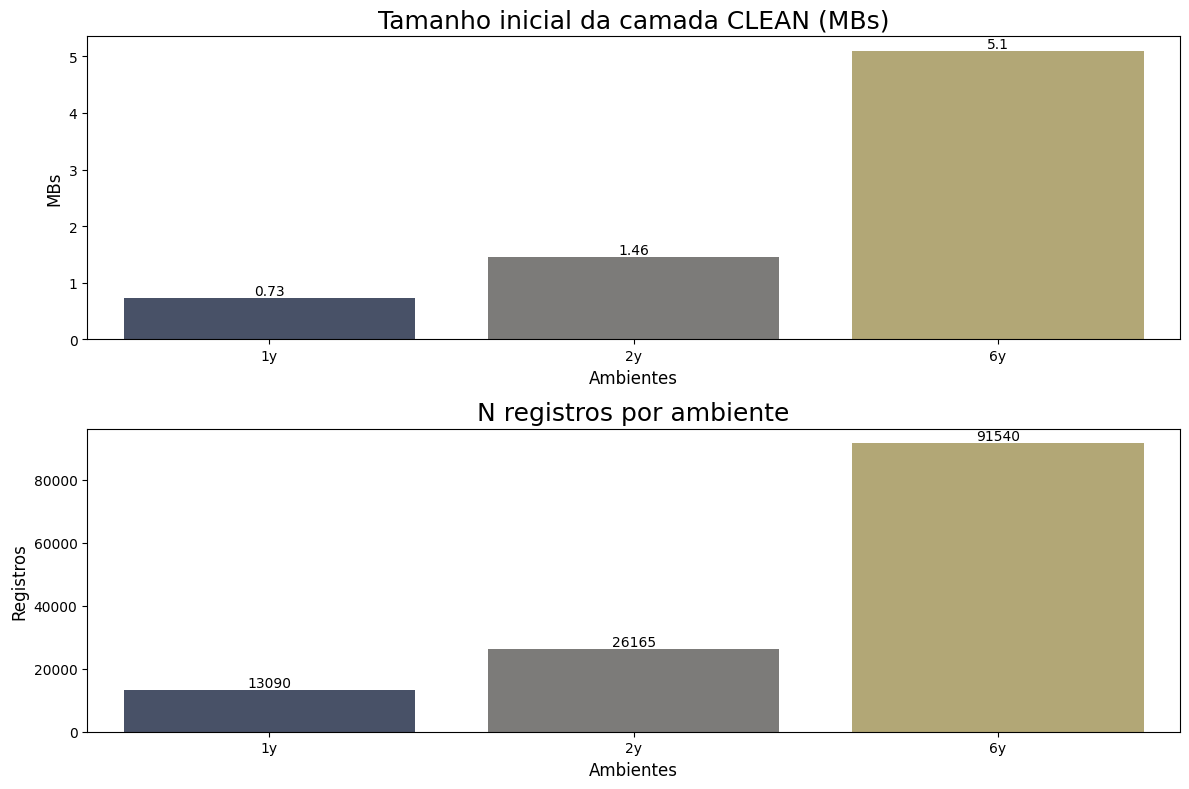

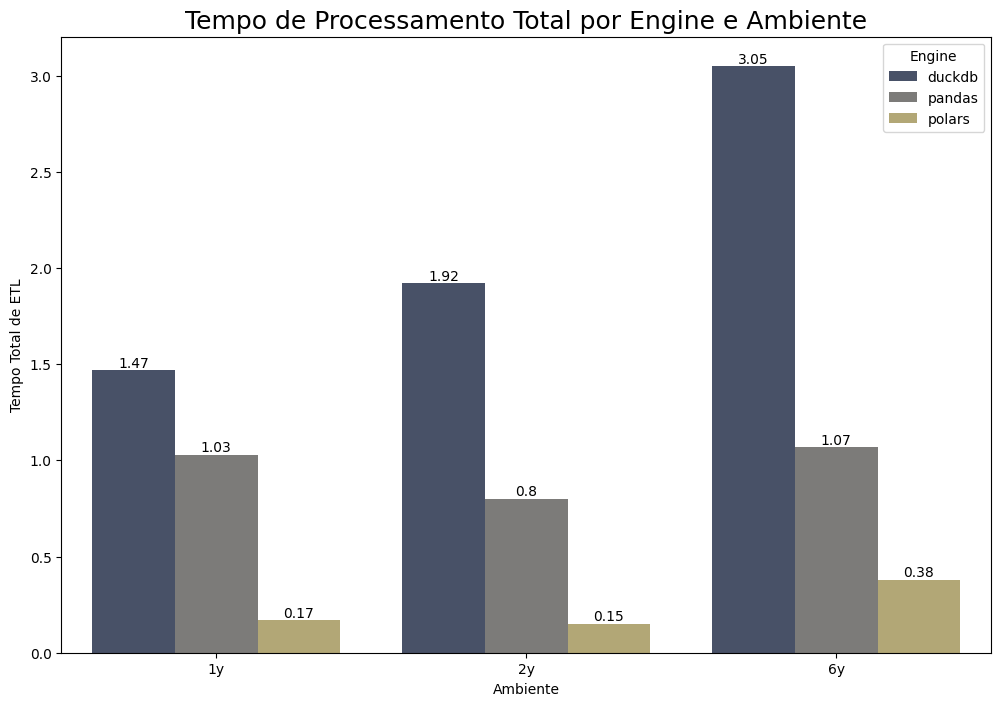

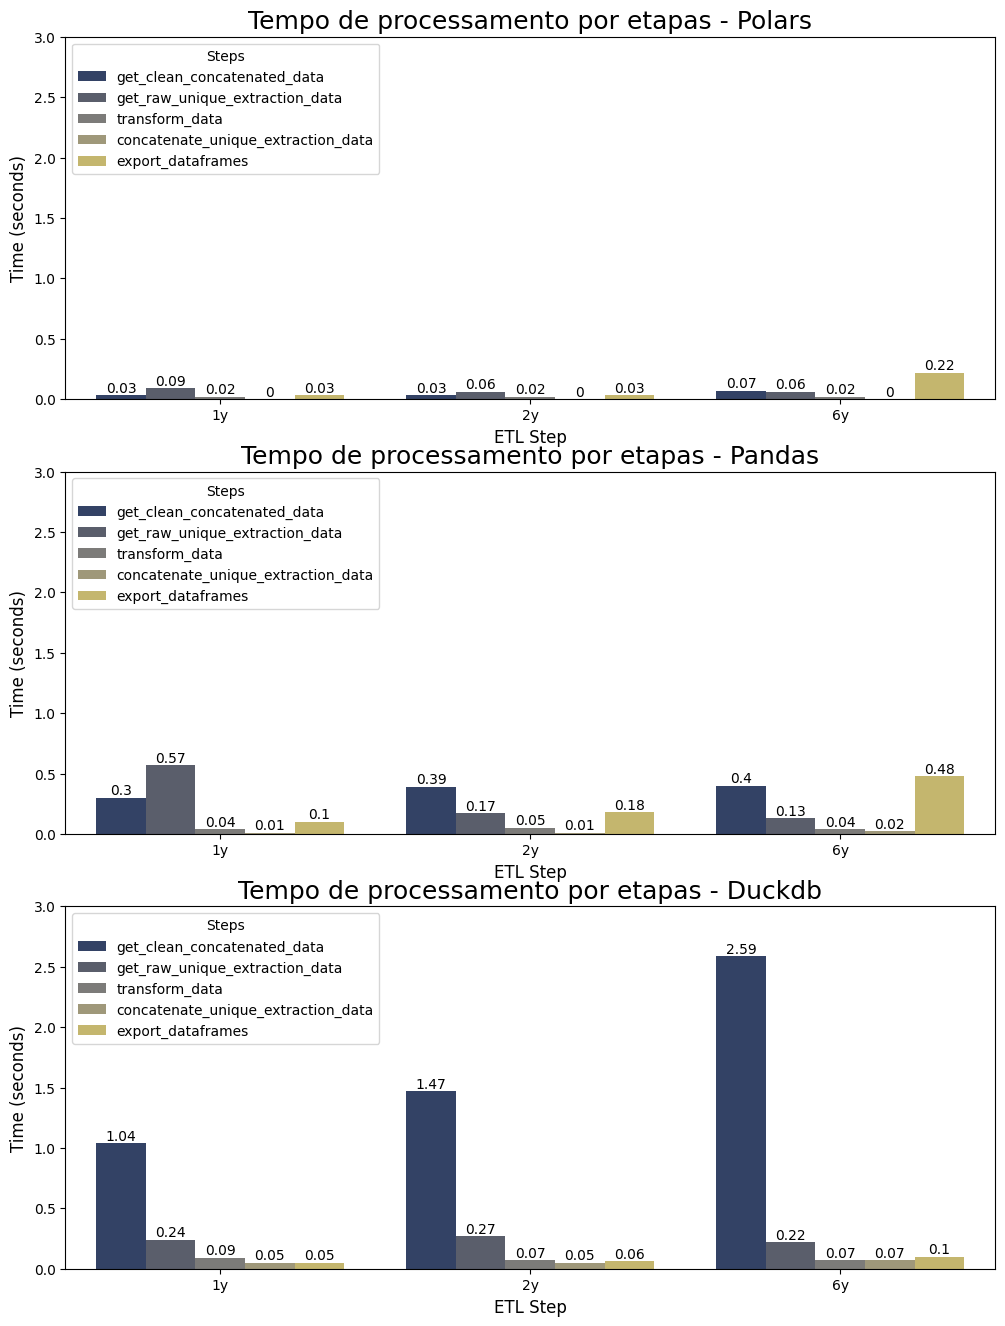

In [19]:
df_env = pd.read_csv('data/linkedin/clean/m2/environments.csv')
df_engines = pd.read_csv('data/linkedin/clean/m2/engines.csv')
img_name = "statistics_m2"

plot_environments_metrics_mode_2(df_env, img_name)
plot_engines_total_time(df_engines, img_name)
plot_engines_steps_time(df_engines, img_name, y_lim=3)